In [14]:
import scipy.io as sio
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [15]:
matFile = sio.loadmat("data.mat")["data"]
matFile

array([[-4.00000000e+00,  5.37667140e-02],
       [-3.96000000e+00,  1.71518293e-01],
       [-3.92000000e+00, -2.48052750e-01],
       [-3.88000000e+00,  5.53129160e-02],
       [-3.84000000e+00, -6.21358801e-03],
       [-3.80000000e+00, -1.74504830e-01],
       [-3.76000000e+00, -9.12121302e-02],
       [-3.72000000e+00, -1.61892973e-02],
       [-3.68000000e+00,  3.06296398e-01],
       [-3.64000000e+00,  2.25805271e-01],
       [-3.60000000e+00, -1.84236694e-01],
       [-3.56000000e+00,  2.57609499e-01],
       [-3.52000000e+00,  3.14865985e-02],
       [-3.48000000e+00, -4.10772633e-02],
       [-3.44000000e+00,  4.44267384e-02],
       [-3.40000000e+00, -3.83886058e-02],
       [-3.36000000e+00, -1.97304028e-02],
       [-3.32000000e+00,  1.53639457e-01],
       [-3.28000000e+00,  1.58957593e-01],
       [-3.24000000e+00,  1.74545769e-01],
       [-3.20000000e+00,  1.16125713e-01],
       [-3.16000000e+00, -5.42569803e-02],
       [-3.12000000e+00,  1.57086681e-01],
       [-3.

In [16]:
X = matFile[:, 0]
y = matFile[:, 1]

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

h_vals = np.linspace(0.1, 60, 40)
test_errors = []


for h in h_vals:
    cv_errors = []
    # Split into five folds
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Augment X_train with 1
        X_train_aug = np.vstack((np.ones(len(X_train)), X_train)).T

        preds = []

        # Compute the diagonal matrix W
        for x0 in X_test:
            W = np.exp(-((x0 - X_train) ** 2) / (2 * h**2))
            W = np.diag(W)

            # Compute beta (bias + coefficients)
            beta_x0 = (
                np.linalg.inv(X_train_aug.T @ W @ X_train_aug)
                @ X_train_aug.T
                @ W
                @ y_train
            )
            x0_aug = np.array([1, x0])
            # Predict using x0_aug
            preds.append(x0_aug @ beta_x0)
        # Compute mean squared errors
        preds = np.array(preds)
        y_test = np.array(y_test)
        cv_errors.append(np.mean((y_test - preds) ** 2))
    # Average mse from five-fold CV and append mean value to test_errors
    test_errors.append(np.mean(cv_errors))


test_errors

[0.01376475425120502,
 0.2147635431724438,
 0.4888414735950789,
 0.6514816212320874,
 0.7319434932916342,
 0.7744253877841345,
 0.7990496298729578,
 0.8144612908219635,
 0.8247031536564503,
 0.831838406265196,
 0.8370009561865335,
 0.8408532545006292,
 0.8438023762361364,
 0.8461092536756059,
 0.8479472175447613,
 0.8494349722259882,
 0.8506559808940292,
 0.8516702906838347,
 0.8525219826947396,
 0.8532440006465558,
 0.8538613601645924,
 0.854393330096381,
 0.8548549452160078,
 0.8552580744344924,
 0.8556121876118572,
 0.8559249142986527,
 0.8562024564651193,
 0.8564498972195418,
 0.8566714344075747,
 0.8568705592652744,
 0.8570501944062716,
 0.857212801382168,
 0.8573604652451763,
 0.8574949615629807,
 0.8576178099254079,
 0.8577303169661002,
 0.8578336111822799,
 0.8579286712914715,
 0.8580163494602149,
 0.8580973904374695]

Text(0.5, 1.0, 'Bandwidth h vs CV Error')

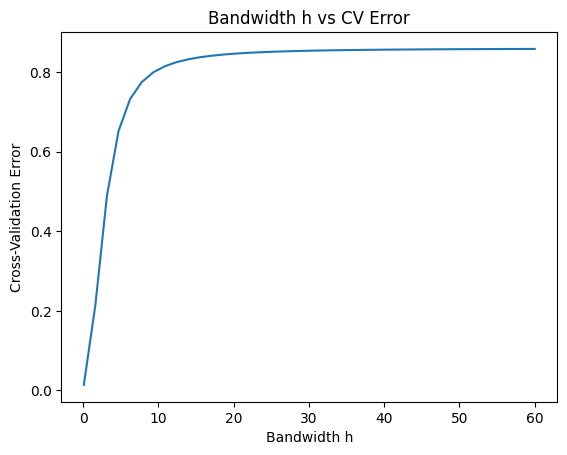

In [18]:
plt.plot(h_vals, test_errors)
plt.xlabel("Bandwidth h")
plt.ylabel("Cross-Validation Error")
plt.title("Bandwidth h vs CV Error")

In [19]:
# Optimal bandwidth h
idx = np.argmin(test_errors)
best_h = h_vals[idx]
best_h

0.1

### Part 3

In [20]:
def predict(x):
    x_data_aug = np.array([1, x])
    # Augment X_train with 1
    X_aug = np.vstack((np.ones(len(X)), X)).T

    W = np.exp(-((x - X) ** 2) / (2 * best_h**2))
    W = np.diag(W)

    # Compute beta (bias + coefficients)
    beta = np.linalg.inv(X_aug.T @ W @ X_aug) @ X_aug.T @ W @ y

    # Predict using X_test_aug
    pred = x_data_aug @ beta
    return pred

In [21]:
# Prediction of a single data point x = -1
x0 = -1
x0_pred = predict(x0)
x0_pred

2.316232783665193

In [22]:
# Create prediction curve
prediction = []

for val in X:
    prediction.append(predict(val))

Text(0, 0.5, 'y')

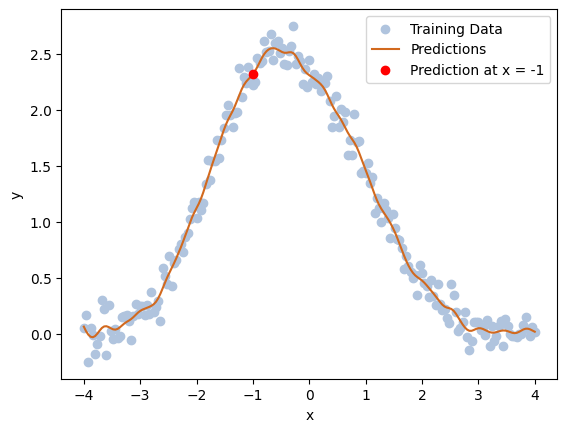

In [23]:
plt.scatter(X, y, label="Training Data", color="lightsteelblue")
plt.plot(X, prediction, label="Predictions", color="chocolate")
plt.plot(x0, x0_pred, "ro", label="Prediction at x = -1")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")